Algorithm 1 Constructing a simplicial complex filtered by a multidimensional dissimilarity measure.

Input: Point cloud P, measure dsim, eps, maximal dimension dim
Output: Filtered complex K

(K0, K1) := graph over P weighted by dsim

Let nr(v) be the unique index of each vertex v ∈ K0.
for d = 2. . . dim do
Kd = ∅
    for each d-simplex S in Kd−1 do
        for each vertex e adjacent to any vertex of S do
            if nr(e) > maxv∈S{nr(v)} {Note that each simplex is created and added
                                    only once and that e /∈ S.} 
                then N = S ∪ e {N is a new d+1 simplex.}
                if dsim(N) ≤ eps 
                then Kd = Kd ∪ N {All faces of N are already in K. }
return K = (K0, . . . , Kdim)

In [355]:
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
from matplotlib.collections import LineCollection as lc

In [9]:
#x=lambda : rnd.gauss(0,5)
#y=rnd.randrange(0,1,100)
#x=np.array(np.arange(1,10))
#y=np.array(np.ones((1,len(x)),int)*2)
m=np.random.randint(low=1,high=6,size=(2,3))
x=m[0]
y=m[1]
print(m,x,y,sep="\n")

[[5 1 2]
 [3 4 4]]
[5 1 2]
[3 4 4]


In [12]:
def dsim(x,y):
    t=x[:,None]
    yt=y[:,None]
    q=np.sqrt((x-t)**2+(y-yt)**2)
    print(t,yt,x-t,y-yt,sep="\n")
    return q
dsim(x,y)


[[5]
 [1]
 [2]]
[[3]
 [4]
 [4]]
[[ 0 -4 -3]
 [ 4  0  1]
 [ 3 -1  0]]
[[ 0  1  1]
 [-1  0  0]
 [-1  0  0]]


array([[0.        , 4.12310563, 3.16227766],
       [4.12310563, 0.        , 1.        ],
       [3.16227766, 1.        , 0.        ]])

In [18]:

def dsim(m):
    dray=[]
    for i in range(m.shape[0]):
        mt=m[i][:,None]
        sqRes=(m[i]-mt)**2
        if i == 0:
            dray=sqRes[:]
        else: 
            dray+= sqRes[:]
    return np.sqrt(dray)
print(dsim(m))



[[0.         4.12310563 3.16227766]
 [4.12310563 0.         1.        ]
 [3.16227766 1.         0.        ]]


In [223]:
edsim=dsim(m)
edsimSort=np.unique(np.sort(np.insert(edsim.reshape(-1),[1],[5.6,7.3,9.9],0)))[1:]
edsQ3=edsimSort[3*(len(edsimSort)-1)//4]
print(edsimSort,edsQ3,sep="\n")

[1.         3.16227766 4.12310563 5.6        7.3        9.9       ]
5.6


In [306]:

ddsim=[]
for i in range(edsim.shape[0]):
  ddsim.append(np.delete(edsim[i], np.s_[i::],0))
ddsimArray=np.concatenate(ddsim[::],dtype='object')
ddIns=np.sort(np.insert(ddsimArray,[1],[5.6,7.3,9.9],0))
ddQ3=ddIns[3*(len(ddIns)-1)//4]
print(ddsimArray, ddIns,ddQ3,sep="\n")


[4.123105625617661 3.1622776601683795 1.0]
[1.0 3.1622776601683795 4.123105625617661 5.6 7.3 9.9]
5.6


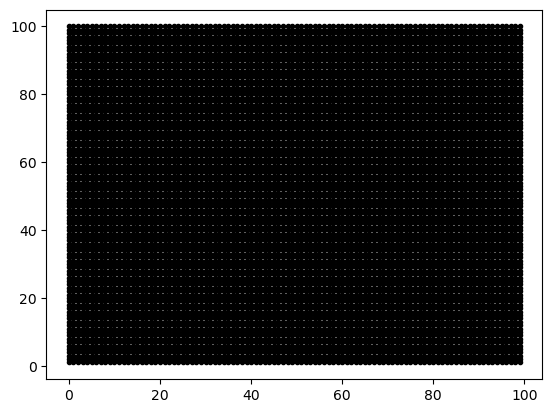

In [56]:
xray=np.linspace(1,100,100)
line=np.ones(100)
#print(xray[:,None])
plt.plot(xray*line[:,None],'k.')
plt.show()

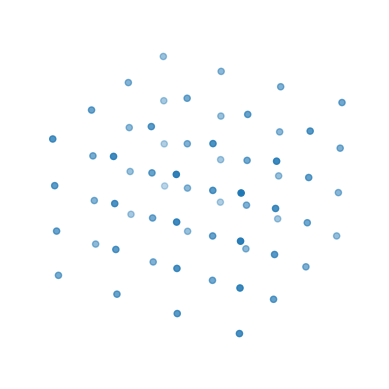

In [317]:
fig = plt.figure()
ax = plt.axes(projection="3d")

x=np.linspace(0,100,4)
y=np.copy(x)
z=np.copy(x)

X,Y,Z=np.meshgrid(x,y,z,indexing='ij')
ax.scatter3D(X,Y,Z)
plt.axis("off")
plt.show()

0.7927507915757459
[[0 2]
 [0 3]
 [0 5]
 [0 8]
 [0 9]
 [1 2]
 [1 4]
 [1 5]
 [1 6]
 [1 7]
 [2 3]
 [2 5]
 [2 8]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 5]]



[[0.88789023 0.53060996 0.99784107 0.74432017 0.14474975 0.25161128
  0.05441835 0.17512271 0.27094155 0.16717125]
 [0.91306531 0.0146387  0.65506739 0.87633948 0.49335592 0.75601422
  0.60059111 0.49648588 0.90031048 0.98108863]]
[[(0.8878902289910025, 0.9130653050857213), (0.9978410687035161, 0.6550673896895904)], [(0.8878902289910025, 0.9130653050857213), (0.7443201688359713, 0.8763394770098051)], [(0.8878902289910025, 0.9130653050857213), (0.2516112765907632, 0.7560142231843258)], [(0.8878902289910025, 0.9130653050857213), (0.2709415492892885, 0.9003104757629012)], [(0.8878902289910025, 0.9130653050857213), (0.16717124861715138, 0.9810886280735268)], [(0.5306099569239416, 0.014638700662315096), (0.9978410687035161, 0.6550673896895904)], [(0.5306099569239416, 0.014638700662315096), (0.14474974951535147, 0.4933559242466905)

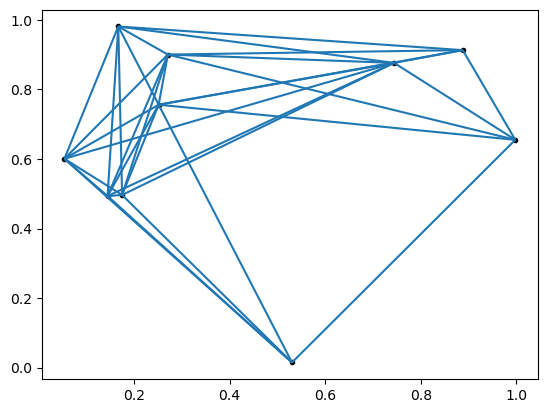

In [417]:
r=np.random.rand(2,10)
#print(r[0],r[1])
rdsim=dsim(r)
#print(rdsim)
rSort=np.unique(np.sort(rdsim.reshape(-1)))[1:]
rQ3=rSort[3*(len(rSort)-1)//4]
print(rQ3)
#plt.plot(r[0],r[1], 'k.')
splitIndex=np.array(np.where((rdsim<=rQ3) & (rdsim!=0)), dtype='object')
izip=np.array(list(zip(splitIndex[0],splitIndex[1])))
izip_=np.unique(list(map(sorted, izip)),axis=0)

itop=list(map(lambda x: [(r[0,x[0]],r[1,x[0]]),(r[0,x[1]],r[1,x[1]])],izip_))
print(izip_[:20],"\n\n",r[:20],itop[:20],sep="\n")



lcs=lc(itop)
fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.add_collection(lcs)
ax1.autoscale()
ax1.scatter(r[0],r[1],marker='.',c='black')
#plt.show()


0.5309521343506738
[[0 5]
 [0 9]
 [1 2]
 [1 7]
 [2 7]
 [3 4]
 [3 6]
 [4 5]
 [4 6]
 [4 7]
 [5 9]
 [6 8]]



[[0.99936833 0.02666209 0.01504481 0.33224706 0.44904578 0.95609169
  0.16503035 0.40166789 0.16286815 0.96805009]
 [0.25577903 0.763739   0.67472362 0.57356342 0.57351373 0.44322819
  0.4315458  0.88291412 0.07617088 0.09070767]
 [0.10657024 0.77997909 0.69641396 0.24931811 0.36377762 0.45232305
  0.06278213 0.68641103 0.0253668  0.07737348]]
[[(0.9993683331697949, 0.2557790258243977, 0.10657024162363082), (0.9560916861239814, 0.4432281895929404, 0.4523230538081553)], [(0.9993683331697949, 0.2557790258243977, 0.10657024162363082), (0.9680500903057916, 0.09070766666591967, 0.07737347935854033)], [(0.026662089753293094, 0.7637389970272641, 0.7799790854307859), (0.015044814212076707, 0.6747236237738525, 0.6964139566135407)], [(0.026662089753293094, 0.7637389970272641, 0.7799790854307859), (0.4016678931384391, 0.8829141210190553, 0.6864110323252965)], [(0.015044814212076707, 0.674723

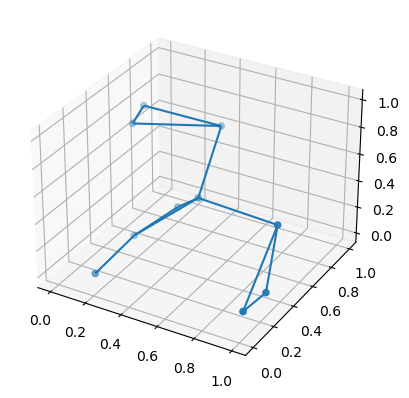

In [435]:
l3c=mplot3d.art3d.Line3DCollection

def dsimN(m):
    '''This function creates a dissimilarity matrix using
     the Euclidean distance metric from a M*N point cloud matrix'''

    dray=[]
    for i in range(m.shape[0]):
        mt=m[i][:,None]
        sqRes=(m[i]-mt)**2
        if i == 0:
            dray=sqRes[:]
        else: 
            dray+= sqRes[:]
    return np.sqrt(dray)

r=np.random.rand(3,10)
rdsim=dsimN(r)
#print(rdsim,r,sep="\n\n")
rSort=np.unique(np.sort(rdsim.reshape(-1)))[1:]
rQ3=rSort[(len(rSort)-1)//4]
print(rQ3)
splitIndex=np.array(np.where((rdsim<=rQ3) & (rdsim!=0)), dtype='object')
#print(splitIndex)
izip=np.array(list(zip(splitIndex[0],splitIndex[1])))
izip_=np.unique(list(map(sorted, izip)),axis=0)
#print(r,izip_,sep="\n\n")
itop=list(map(lambda x: [tuple(r[:,x[0]]),tuple(r[:,x[1]])],izip_))
print(izip_[:20],"\n\n",r[:20],itop[:20],sep="\n")

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.add_collection(l3c(itop))
ax.scatter3D(r[0],r[1],r[2])

#lcs=lc(itop)
#fig = plt.figure()

#ax1 = plt.axes(projection="3d")
#ax1.add_collection(lcs)
#ax1.autoscale()
#ax1.scatter(r[0],r[1],marker='.',c='black')
plt.show()

In [ ]:
def dsimN(m):
    '''This function creates a dissimilarity matrix using
     the Euclidean distance metric from a M*N point cloud matrix'''

    dray=[]
    for i in range(m.shape[0]):
        mt=m[i][:,None]
        sqRes=(m[i]-mt)**2
        if i == 0:
            dray=sqRes[:]
        else: 
            dray+= sqRes[:]
    return np.sqrt(dray)



l3c=mplot3d.art3d.Line3DCollection

r=np.random.rand(2,10)
#print(r[0],r[1])
rdsim=dsimN(r)
#print(rdsim)
rSort=np.unique(np.sort(rdsim.reshape(-1)))[1:]
rQ3=rSort[(len(rSort)-1)//4]
print(rQ3)
#plt.plot(r[0],r[1], 'k.')
splitIndex=np.array(np.where((rdsim<=rQ3) & (rdsim!=0)), dtype='object')
izip=np.array(list(zip(splitIndex[0],splitIndex[1])))
izip_=np.unique(list(map(sorted, izip)),axis=0)

itop=list(map(lambda x: [(r[0,x[0]],r[1,x[0]]),(r[0,x[1]],r[1,x[1]])],izip_))
print(izip_[:20],"\n\n",r[:20],itop[:20],sep="\n")



lcs=lc(itop)
fig = plt.figure()

ax2 = fig.add_subplot(1, 1, 1)
ax2.add_collection(lcs)
ax1.autoscale()
ax1.scatter(r[0],r[1],marker='.',c='black')
#plt.show()